# LOAD DATA AND PREPROCESSING DATA

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [154]:
data=pd.read_csv('DATAA.CSV')
print(data)

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [155]:
data.isnull().sum(0)

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [156]:
data.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [157]:
data.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

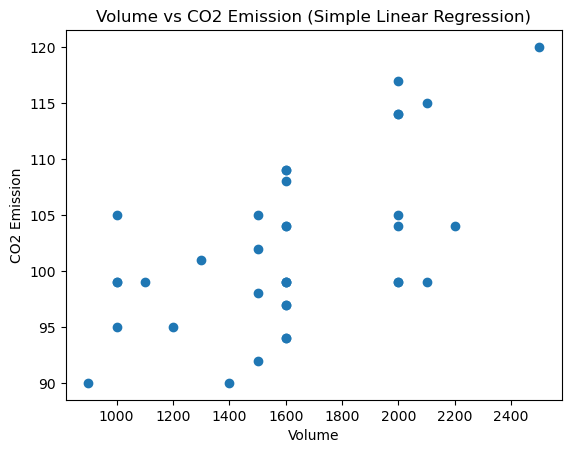

In [158]:
import matplotlib.pyplot as plt
Volume_x=data['Volume']
CO2_Y=data['CO2']
plt.scatter(Volume_x, CO2_Y)
plt.xlabel("Volume")
plt.ylabel("CO2 Emission")
plt.title("Volume vs CO2 Emission (Simple Linear Regression)")
plt.show()

# SEPARATE FEATURES AND TARGET

In [159]:

from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data['Car_encoded']=Encoder.fit_transform(data['Car'])
data['Model_encoded']=Encoder.fit_transform(data['Model'])
#X=data[[  'Car_encoded', 'Model_encoded','Volume', 'Weight']]# feature
X=data[[  'Volume', 'Weight']]# feature
y=data['CO2']#target
data['Car_encoded']
maped=dict(zip(Encoder.classes_, Encoder.transform(Encoder.classes_)))
print(maped)

{'1': np.int64(0), '216': np.int64(1), '3': np.int64(2), '5': np.int64(3), '500': np.int64(4), 'A-Class': np.int64(5), 'A1': np.int64(6), 'A4': np.int64(7), 'A6': np.int64(8), 'Astra': np.int64(9), 'Aygo': np.int64(10), 'B-Max': np.int64(11), 'C-Class': np.int64(12), 'CLA': np.int64(13), 'Citigo': np.int64(14), 'Civic': np.int64(15), 'Cooper': np.int64(16), 'E-Class': np.int64(17), 'Fabia': np.int64(18), 'Fiesta': np.int64(19), 'Focus': np.int64(20), 'I20': np.int64(21), 'I30': np.int64(22), 'Insignia': np.int64(23), 'Mondeo': np.int64(24), 'Octavia': np.int64(25), 'Rapid': np.int64(26), 'S60': np.int64(27), 'SLK': np.int64(28), 'Space Star': np.int64(29), 'Swift': np.int64(30), 'Up!': np.int64(31), 'V70': np.int64(32), 'XC70': np.int64(33), 'Zafira': np.int64(34)}


In [160]:
print(y)

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64


# SEPARATE TRAIN and TEST DATA

In [161]:
from sklearn.model_selection import train_test_split # importing library from splitting
#input train, input test,output train, output test=function for split(input,output,test_size, random state)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=0)
X_train.shape, y_train.shape


((28, 2), (28,))

In [162]:
data.shape

(36, 7)

# CREATE AND TRAIN MODEL

In [163]:

from sklearn.linear_model import LinearRegression
MLR_model= LinearRegression()# creating a model
MLR_model.fit(X_train,y_train)

LinearRegression()

In [164]:
y_pred = MLR_model.predict(X_test)
y_pred.shape

(8,)

In [165]:
Volume = 2300
Weight = 1300
y_pred = MLR_model.predict([[2500,1395]])

print("Predicted CO2 Emission:", y_pred[0])

Predicted CO2 Emission: 109.80289359999763


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# MODEL EVALUATION

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict the output (percentage) using the test data
y_pred = MLR_model.predict(X_test)

# Calculate evaluation metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

# Print the results clearly
print("MODEL PERFORMANCE RESULTS")
print("-------------------------")
print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")
print(f"R-Squared Score (R²): {R2}")

MODEL PERFORMANCE RESULTS
-------------------------
Mean Absolute Error (MAE): 5.642098903028479
Mean Squared Error (MSE): 41.485363072660526
Root Mean Squared Error (RMSE): 6.440913217289962
R-Squared Score (R²): 0.4061589718966062


# SAVING MODEL

In [171]:

import pickle
filename='Saved_Group_1.sav'
pickle.dump(MLR_model,open (filename, 'wb'))
#load the saved model
loaded_model=pickle.load(open (filename, 'rb'))

In [172]:
#predict using saved model
import pickle
filename='Saved_Group_1.sav'

#load the saved model
loaded_model=pickle.load(open (filename, 'rb'))
#y_pred_test=loaded_model. predict(X_test)
#y_pred_test_2300=loaded_model. predict([[2300]])
#y_pred_test_2300
y_pred = MLR_model.predict([[2300,1300]])

print("Predicted CO2 Emission:", y_pred[0])

Predicted CO2 Emission: 107.58535782607979


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT